## Week 4 Assignment 
### Assessing distribution of affordable housing projects across Los Angeles County
#### Miles Cressy

The goal of this assignment is to build off the previous assignment but rather than focusing on rent burden data by census tract, we will evaluate the location of affordable housing projects in the greater Los Angeles area. To build toward our group project's research question of assessing structural racism, we will visualize the density of affordable housing development layered on top of race data in order to help inform where affordable housing developments are being located. Although affordable housing developments should be built to serve the communities that require it, it is important to assess whether or not predominantly white areas are allowing for low-income/affordable housing to be built.

In [63]:
# standard data manipulation
import pandas as pd

# geospatial data manipulation/visualization
import geopandas as gpd

# advanced graph visualization/geospatial
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import plotly.express as px

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
sns.set_style("dark")

Below is a code block that is consolidated from the last notebook - this can be skipped as there is nothing new here.

In [65]:
# re-import rent burden csv file but this time with Geo_FIPS as a string
df = pd.read_csv('data/rent_burden_ct_1.csv', dtype = {'Geo_FIPS':str})
# fips column does not have a leading zero, let's add that here
df['Geo_FIPS'] = df['Geo_FIPS'].str.zfill(11)
# import census tract spatial data
tracts=gpd.read_file('data/Census_Tracts_2020.geojson')
# create FIPS column
tracts['fips'] ='06' + '037' + tracts['CT20']
tracts = tracts[['geometry','fips']]
# rename column
df = df.rename({'Geo_FIPS': 'fips'}, axis=1)
# create a new dataframe based on the join
df_tracts=tracts.merge(df,on="fips")

In [66]:
# view dataframe
df_tracts.head()

,geometry,fips,total_housing_units,white_alone,black_alone,american_indian_alone,asian_alone,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total_pop,rent_burden
0,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,644,438,0,0,58,0,52,96,372,207,3879,0.549689
1,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,344,287,0,0,0,0,33,24,287,33,4247,0.706395
2,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,762,450,8,16,48,0,110,130,394,285,3583,0.535433
3,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,1140,815,68,0,25,0,178,54,747,269,3723,0.663158
4,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,816,715,17,0,28,17,28,11,515,239,2690,0.651961


In order to get an idea as to how race is reflected throughout LA neighborhoods/areas, we will create a new variable that categorizes each census tract by the predominant race of the renter population.

In [67]:
# create function that creates assesses the renter population by race then assigns that row with one of the major race categories
def categorise_race_tracts(row):  
    if row['black_alone'] > row['white_alone'] and row['black_alone'] > row['hispanic'] and row['black_alone'] > row['other'] and row['black_alone'] > row['asian_alone']:
        return 'Black'
    elif row['hispanic'] > row['white_alone'] and row['hispanic'] > row['black_alone'] and row['hispanic'] > row['other'] and row['hispanic'] > row['asian_alone']:
        return 'Hispanic'
    elif row['white_alone'] > row['hispanic'] and row['white_alone'] > row['black_alone'] and row['white_alone'] > row['other'] and row['white_alone'] > row['asian_alone']:
        return 'White'
    elif row['asian_alone'] > row['hispanic'] and row['asian_alone'] > row['black_alone'] and row['asian_alone'] > row['other'] and row['black_alone'] > row['white_alone']:
        return 'Asian'
    return 'Other'

In [68]:
# iterate on dataframe and create new column by applying created race function
df_tracts['majority_race'] = df_tracts.apply(lambda row: categorise_race_tracts(row), axis=1)
# assess results
df_tracts.value_counts('majority_race')

majority_race
Hispanic    1145
White       1008
Other        209
Black        119
Asian         14
dtype: int64

<AxesSubplot: >

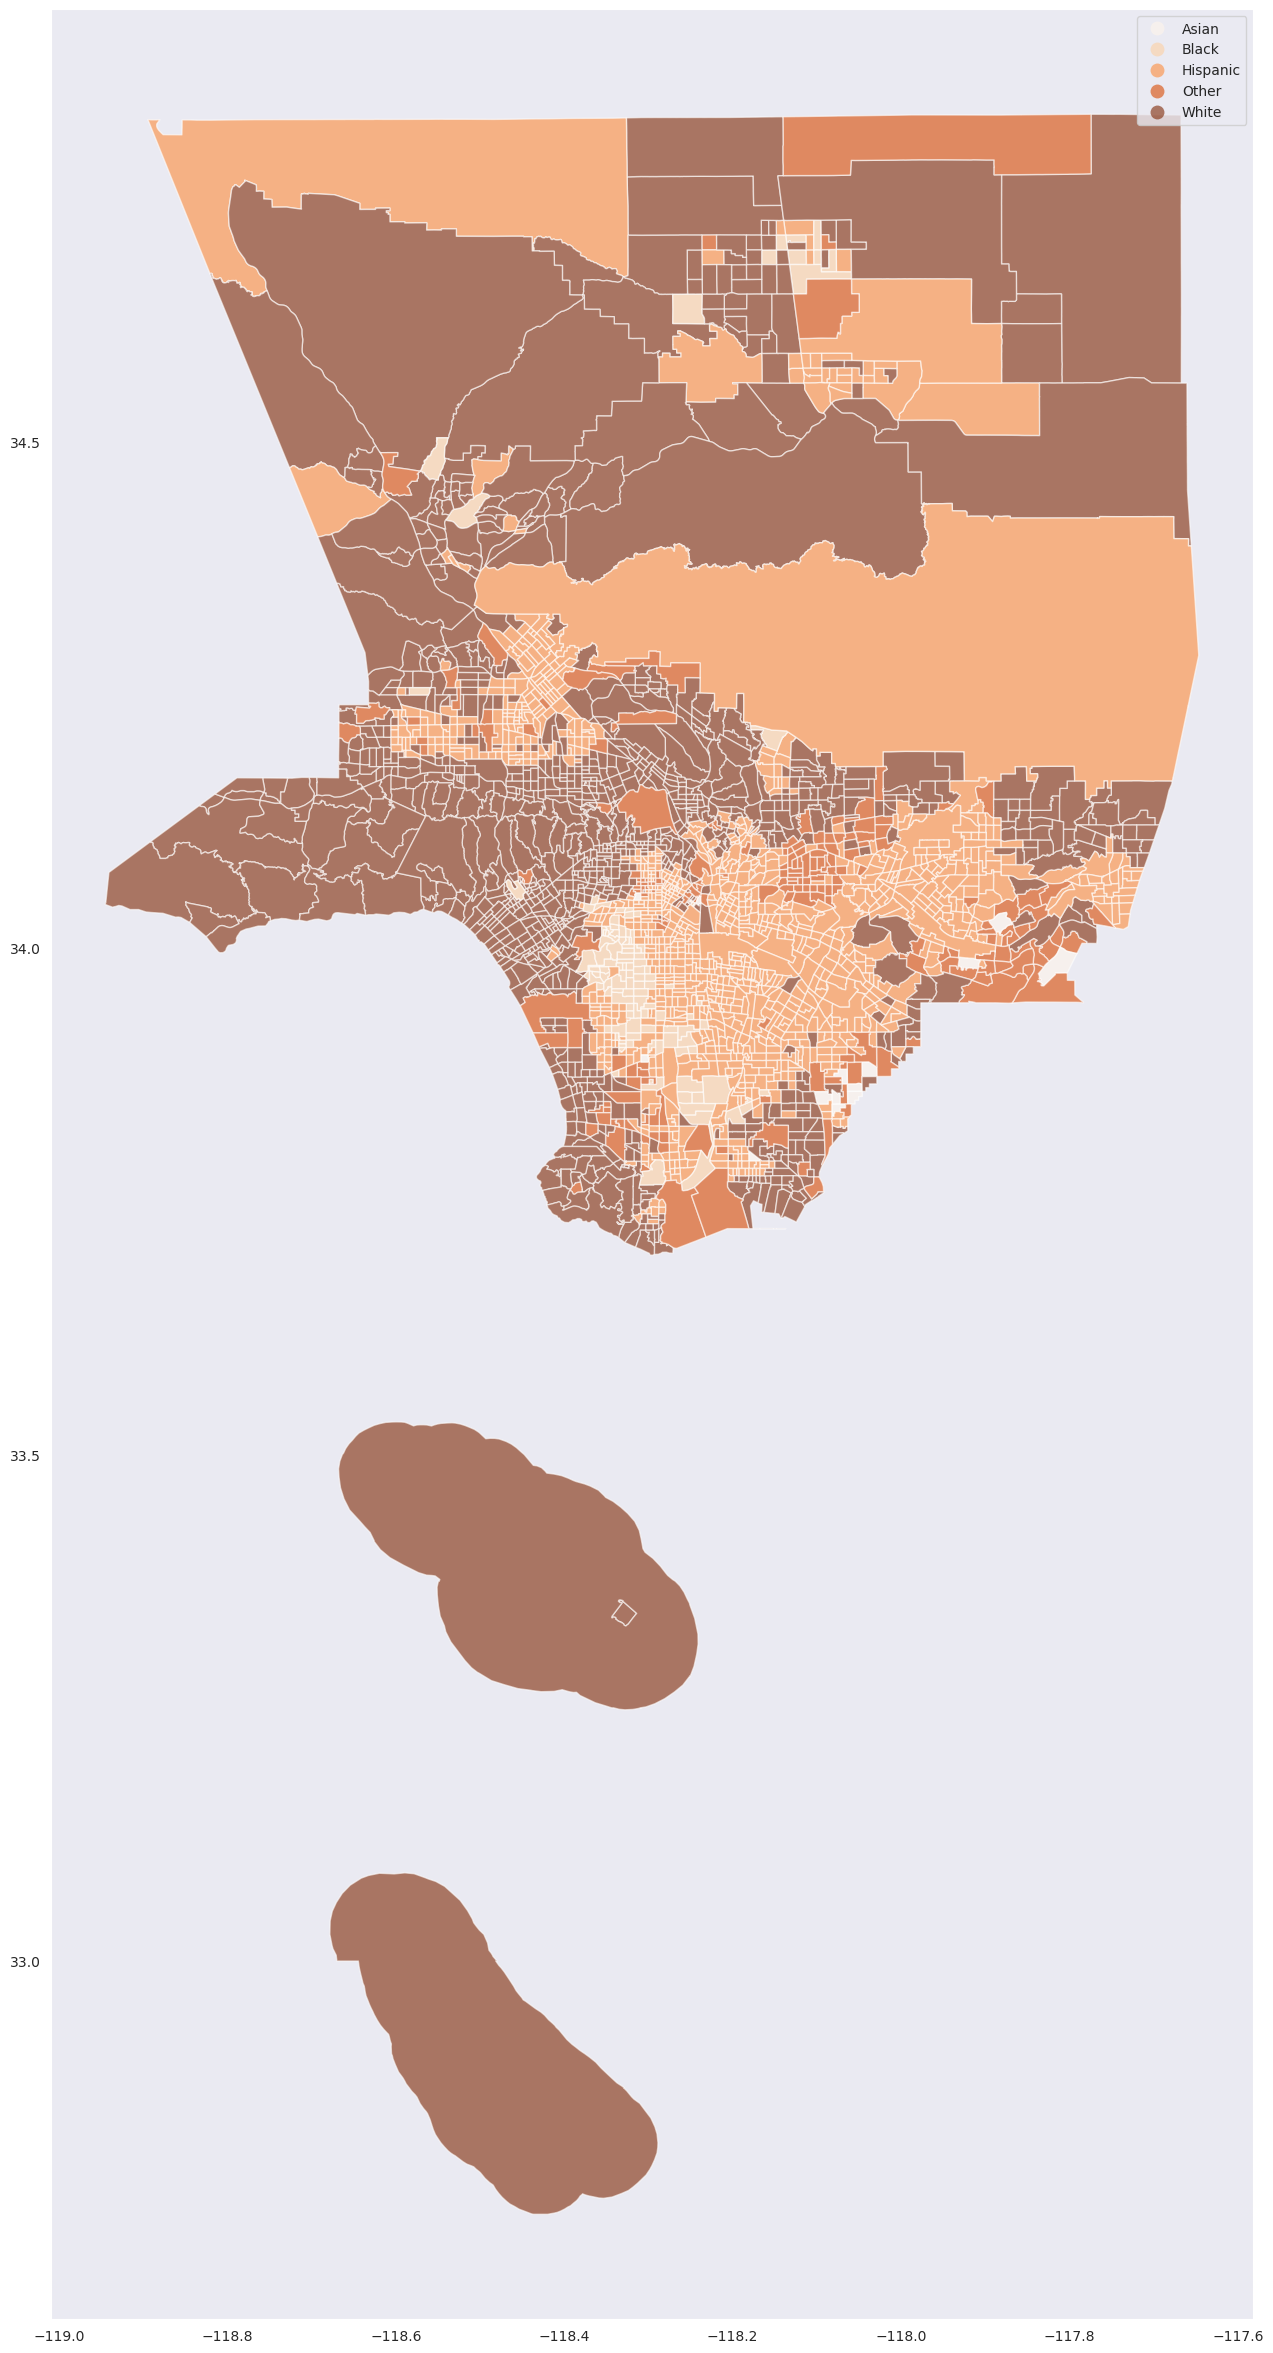

In [69]:
#plot census tracts by predominant race category of renters
fig,ax = plt.subplots(figsize=(30,30))

df_tracts.plot(ax=ax,column='majority_race',legend=True,cmap='Oranges', alpha = .6)

In [70]:
#add affordable housing tracking dataset
df_housing = pd.read_csv('data/affordable_housing_tracker.csv')

In [71]:
# inspect new dataframe
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   APN                      558 non-null    int64  
 1   PROJECT NUMBER           558 non-null    object 
 2   NAME                     558 non-null    object 
 3   DEVELOPMENT STAGE        558 non-null    object 
 4   CONSTRUCTION TYPE        528 non-null    object 
 5   SITE ADDRESS             558 non-null    object 
 6   SITE  COUNCIL DISTRICT   558 non-null    int64  
 7   SITE #                   558 non-null    int64  
 8   SITE COMMUNITY           551 non-null    object 
 9   SITE UNITS               558 non-null    int64  
 10  PROJECT TOTAL UNITS      558 non-null    int64  
 11  HOUSING TYPE             541 non-null    object 
 12  SUPPORTIVE HOUSING       558 non-null    object 
 13  SH UNITS PER SITE        558 non-null    int64  
 14  DATE FUNDED              5

In [72]:
pd.set_option('display.max_columns', None)
df_housing.head()

,APN,PROJECT NUMBER,NAME,DEVELOPMENT STAGE,CONSTRUCTION TYPE,SITE ADDRESS,SITE COUNCIL DISTRICT,SITE #,SITE COMMUNITY,SITE UNITS,PROJECT TOTAL UNITS,HOUSING TYPE,SUPPORTIVE HOUSING,SH UNITS PER SITE,DATE FUNDED,LAHD FUNDED,LEVERAGE,TAX EXEMPT CONDUIT BOND,TDC,IN-SERVICE DATE,DEVELOPER,MANAGEMENT COMPANY,CONTACT PHONE,PHOTO,JOBS,PROJECT SUMMARY URL,CONTRACT NUMBERS,DATE STAMP,SITE LONGITUDE,SITE LATITUDE,GPS_COORDS ON MAP
0,5143020023,02-118256,SAN LUCAS APARTMENTS,In-Service,NEW CONSTRUCTION,"1221 W 7TH ST Los Angeles, CA 90017",1,1,WESTLAKE,196,196,SENIORS,No,0,11/29/2001,0.00,0.0,0,0.00,2003,NaN,GSL PROPERRTY MANAGEMENT,NaN,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.26681,34.05209,POINT (-118.26681 34.05209)
1,6032019034,14-121272,MARTHA BRYANT MANOR- RECAP,In-Service,ACQUISITION + REHAB,"8300 S HOOVER ST Los Angeles, CA 90044",8,1,VERMONT VISTA,77,77,FAMILY,No,0,2/27/2015,0.00,7558174.0,4410000,11968174.00,2016,"BARKER MANAGEMENT, INC.","LEVINE MANAGEMENT GROUP, INC.",(310) 358-3489,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.28691,33.96297,POINT (-118.28691 33.96297)
2,5050011005,05-117193,LEEWARD APTS. (SITE 7),In-Service,REHAB,"2809 S WEST BLVD Los Angeles, CA 90016",10,7,CRENSHAW DISTRICT,0,257,FAMILY,No,0,5/2/2005,0.00,7103994.0,10208936,17312930.00,2006,"HAMPSTEAD PARTNERS, INC.","ALPHA PROPERTY MANAGEMENT, INC.",(323) 231-4174,click here (http://hcidapp.lacity.org/mpphotos...,NaN,click here (http://hcidapp.lacity.org/ahtfRepo...,NaN,2023-01-09T00:00:00.000,-118.34182,34.03071,POINT (-118.34182 34.03071)
3,5114014020,14-121652,FLORENCE MILLS (SITE 5),In-Service,NEW CONSTRUCTION,"1037 E MARTIN LUTHER KING BLVD LOS ANGELES, C...",9,5,CENTRAL,0,74,SPECIAL NEEDS,Yes,0,12/17/2018,9389115.63,36081992.0,0,45471107.63,2021,Hollywood Community Housing Corporation,BARKER MANAGEMENT INCORPORATED,(714) 533-3450,click here (http://hcidapp.lacity.org/mpphotos...,226.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-129358,2023-01-09T00:00:00.000,-118.25748,34.01115,POINT (-118.25748 34.01115)
4,4012018025,60013,MORGAN PLACE SENIOR APTS.,In-Service,NEW CONSTRUCTION,"7305 S CRENSHAW BLVD Los Angeles, CA 90043",8,1,HYDE PARK,55,55,SENIORS,No,0,4/2/2007,5281147.00,8428737.0,0,13709884.00,2009,Abode Communities previously known as LA COMMU...,ABODE COMMUNITIES,(213) 225-2772,click here (http://hcidapp.lacity.org/mpphotos...,110.0,click here (http://hcidapp.lacity.org/ahtfRepo...,C-111486,2023-01-09T00:00:00.000,-118.33108,33.97348,POINT (-118.33108 33.97348)


In [73]:
# trim down dataset and assign to new variable
dfh = df_housing.drop(columns = ['APN','PROJECT NUMBER', 'NAME', 'SITE #', 'SITE UNITS', 'SUPPORTIVE HOUSING', 'SH UNITS PER SITE', 'MANAGEMENT COMPANY', 'CONTACT PHONE', 'PHOTO', 'CONTRACT NUMBERS', 'DATE STAMP', 'PROJECT SUMMARY URL']) 

### Exploratory Data Analysis

In [74]:
# visualize development counts by communitiy
devs_by_community = dfh.value_counts('SITE COMMUNITY').reset_index(name='count')
devs_by_community

,SITE COMMUNITY,count
0,WESTLAKE,38
1,WHOLESALE DISTRICT,27
2,HOLLYWOOD,20
3,CENTRAL,19
4,TEMPLE-BEAUDRY,17
...,...,...
81,LOS FELIZ,1
82,MANCHESTER SQUARE,1
83,RANCHO PARK,1
84,SHERMAN OAKS,1


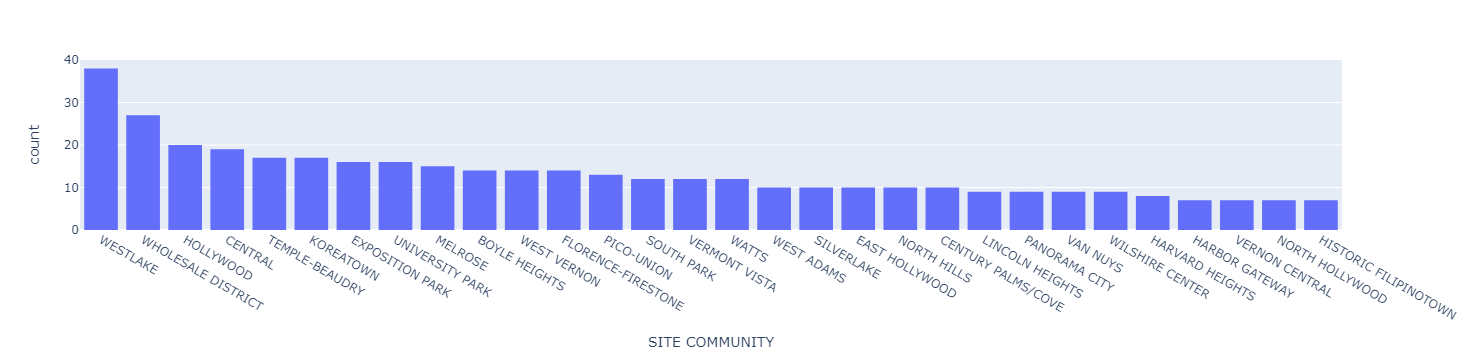

In [75]:
# create plot to visualize breakdown above, top 30 communities
fig = px.bar(devs_by_community.head(30), x= 'SITE COMMUNITY', y = 'count')

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [76]:
# inspect value counts for housing type
dfh.value_counts('HOUSING TYPE')

HOUSING TYPE
FAMILY                            242
SPECIAL NEEDS                     180
SENIORS                            93
LARGE FAMILY / WAIVER REQUIRED     23
AT-RISK                             2
SRO                                 1
dtype: int64

In [77]:
# create new df where communities are now broken down by their housing type
devs_by_community_by_htype = dfh.value_counts(['SITE COMMUNITY','HOUSING TYPE']).reset_index(name='count')
devs_by_community_by_htype

,SITE COMMUNITY,HOUSING TYPE,count
0,WHOLESALE DISTRICT,SPECIAL NEEDS,21
1,WESTLAKE,FAMILY,18
2,WESTLAKE,SPECIAL NEEDS,14
3,UNIVERSITY PARK,FAMILY,12
4,WATTS,FAMILY,10
...,...,...,...
184,HIGHLAND PARK,SENIORS,1
185,HIGHLAND PARK,FAMILY,1
186,HARBOR CITY,SPECIAL NEEDS,1
187,HARBOR CITY,FAMILY,1


In [78]:
# create total count column as we lost it in subdividing our communities - we still want to order our df by communities with the largest count in descending order
devs_by_community_by_htype['total_count'] = devs_by_community_by_htype.groupby("SITE COMMUNITY", sort=False)["count"].transform('sum')
# sort values first by total count then by community name
devs_by_community_by_htype = devs_by_community_by_htype.sort_values(['total_count', 'SITE COMMUNITY'], ascending = False)
# inspect re-ordered dataframe
devs_by_community_by_htype.head(51)

,SITE COMMUNITY,HOUSING TYPE,count,total_count
1,WESTLAKE,FAMILY,18,37
2,WESTLAKE,SPECIAL NEEDS,14,37
39,WESTLAKE,SENIORS,4,37
106,WESTLAKE,LARGE FAMILY / WAIVER REQUIRED,1,37
0,WHOLESALE DISTRICT,SPECIAL NEEDS,21,27
21,WHOLESALE DISTRICT,FAMILY,6,27
5,HOLLYWOOD,SENIORS,10,20
23,HOLLYWOOD,FAMILY,6,20
54,HOLLYWOOD,SPECIAL NEEDS,3,20
183,HOLLYWOOD,LARGE FAMILY / WAIVER REQUIRED,1,20


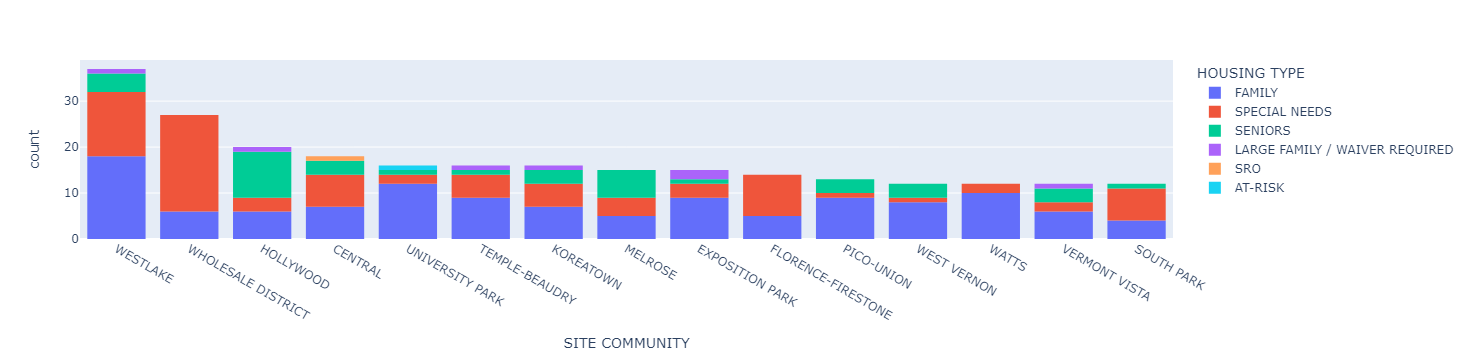

In [79]:
# create plot to visualize breakdown above, top 50 rows but with housing type as an additional variable for observation
fig = px.bar(devs_by_community_by_htype.head(50), x= 'SITE COMMUNITY', y = 'count', color='HOUSING TYPE')

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

In [80]:
# lets visualize the dataframe spatially by converting it to a geodataframe
gdfh = gpd.GeoDataFrame(dfh, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(df_housing['SITE LONGITUDE'], df_housing['SITE LATITUDE']))

<AxesSubplot: >

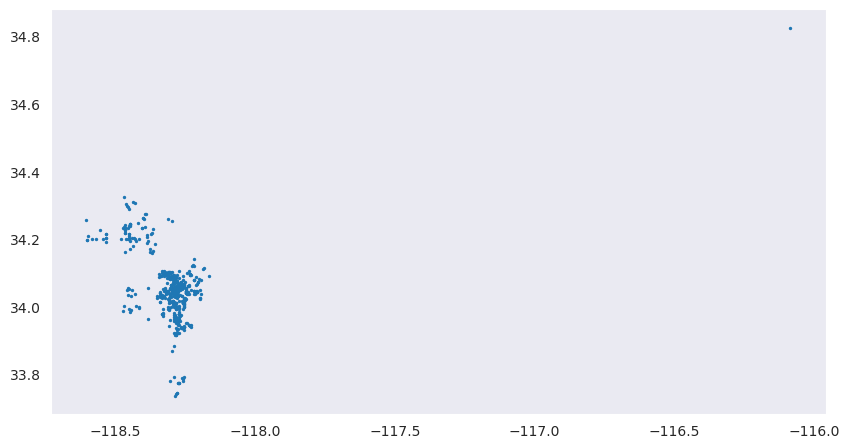

In [81]:
# basic plot
gdfh.plot(figsize=(10,10), markersize = 2)

<AxesSubplot: >

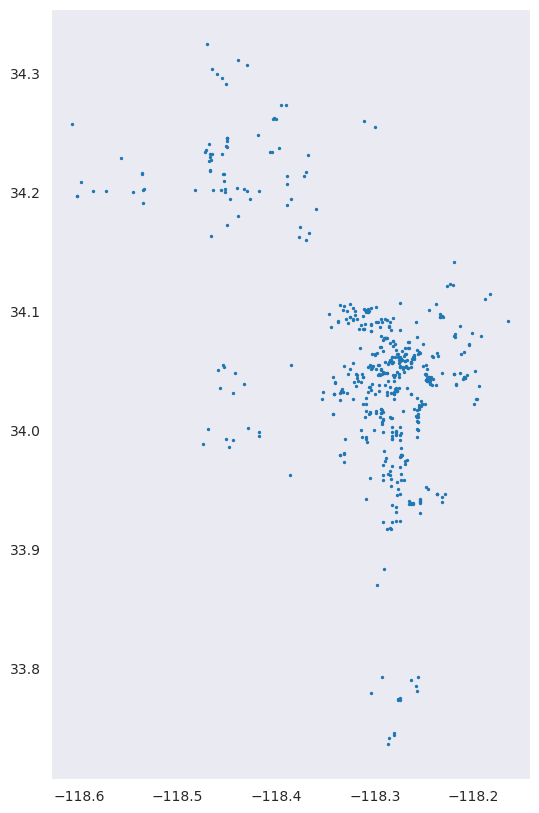

In [82]:
# lets drop the observation that appears to be an outlier and replot
gdfh = gdfh[gdfh['SITE LATITUDE'] < 34.8]
gdfh.plot(figsize=(10,10), markersize = 2)

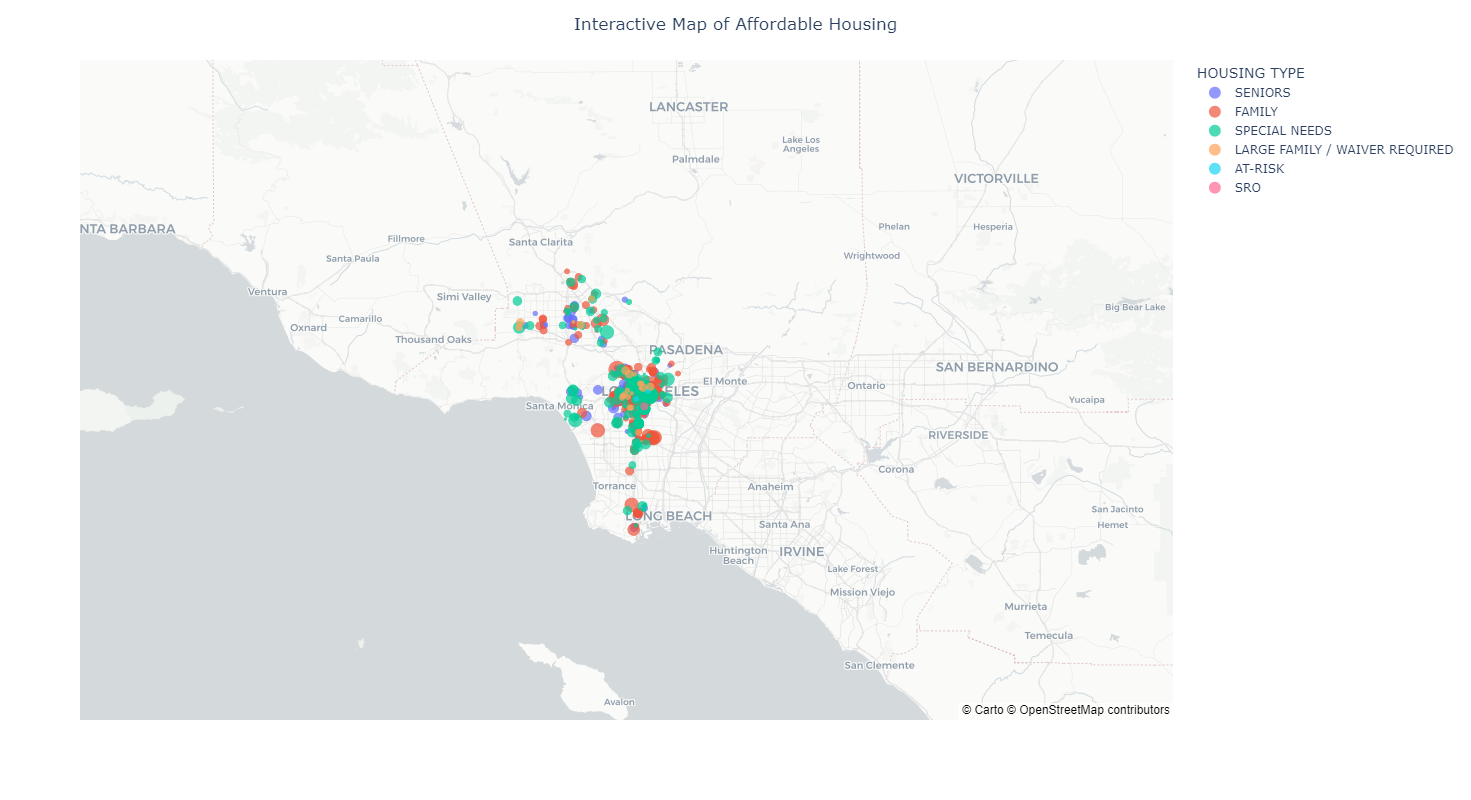

In [83]:
# plot using plotly.express with color indicating housing type and size indicating funding amount
fig = px.scatter_mapbox(gdfh,
                        lat='SITE LATITUDE',
                        lon='SITE LONGITUDE',
                        mapbox_style="carto-positron",
                        color = 'HOUSING TYPE',
                        size = 'TDC')

# options on the layout
fig.update_layout(
    width = 1600,
    height = 800,
    title = "Interactive Map of Affordable Housing",
    title_x=0.5 # aligns title to center
) 

fig.show()


<AxesSubplot: >

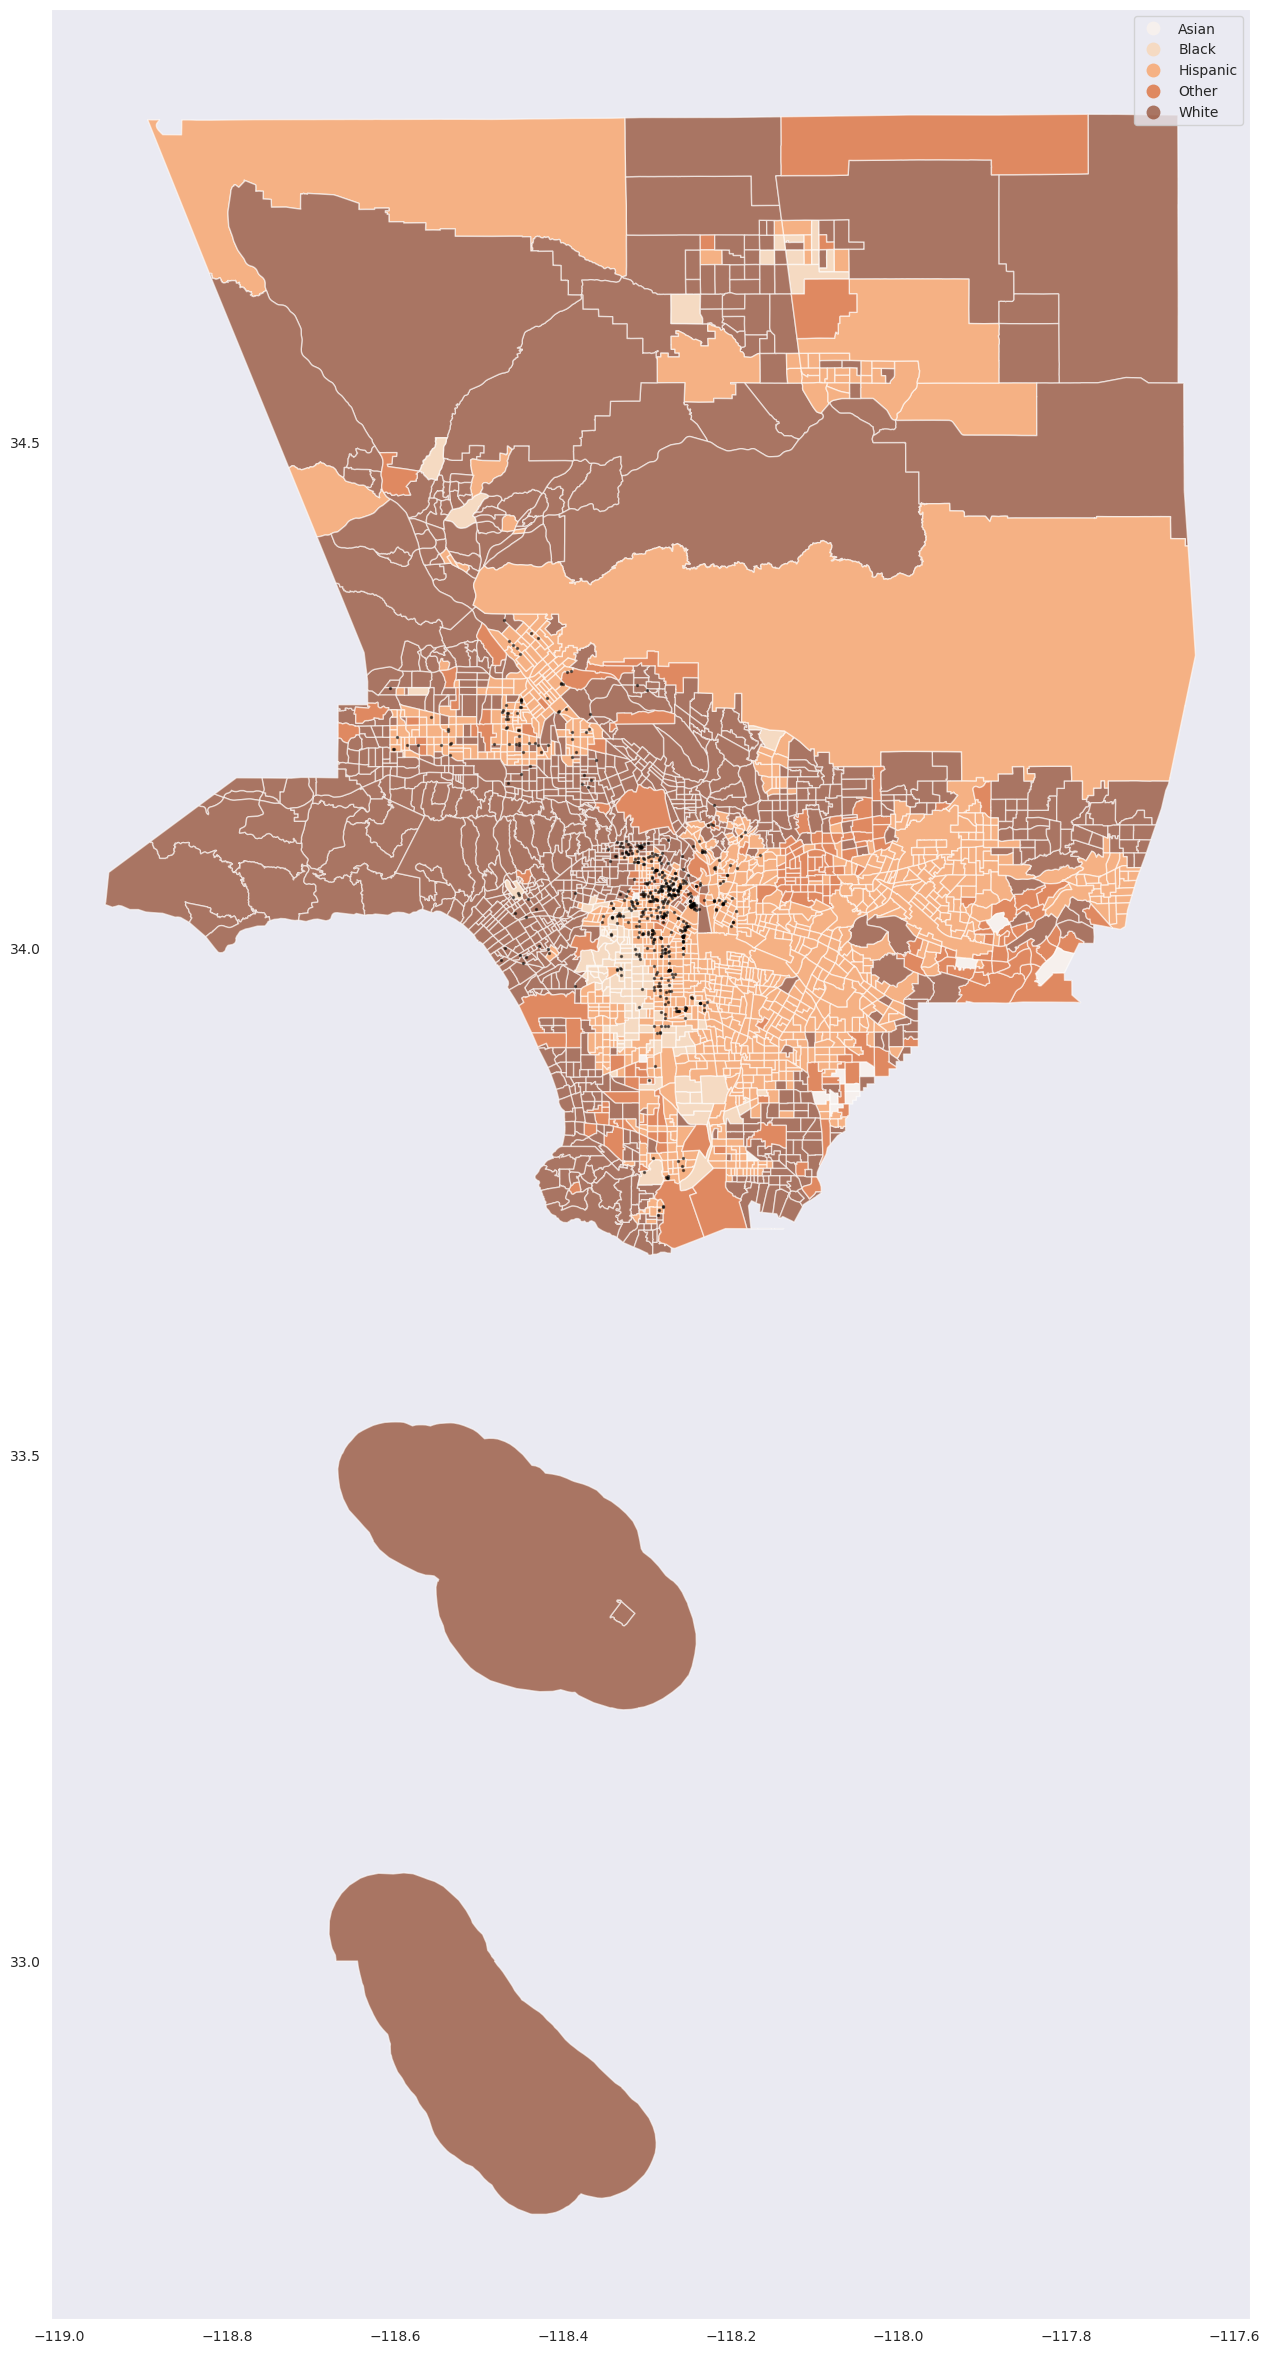

In [84]:
#plot census tracts by predominant race category of renters
fig,ax = plt.subplots(figsize=(30,30))

df_tracts.plot(ax=ax,column='majority_race',legend=True,cmap='Oranges', alpha = .6)

gdfh.plot(ax=ax, figsize=(10,10), markersize = 2, color = "black", alpha =.5)

Let's look at what happens when we consolidate the census tracts into larger neighborhoods as this might give us a better sense and intuition for the areas that demonstrate high/low numbers of affordable housing developments and their renter population.

In [85]:
# find centroid of each census tract as this will determine which neighborhood they fall into
df_tracts['centroid'] = df_tracts['geometry'].centroid
df_tracts.head(3)

,geometry,fips,total_housing_units,white_alone,black_alone,american_indian_alone,asian_alone,native_hawaiian_alone,other,two_or_more,white_alone_not_hisp,hispanic,total_pop,rent_burden,majority_race,centroid
0,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,644,438,0,0,58,0,52,96,372,207,3879,0.549689,White,POINT (-118.29300 34.25948)
1,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,344,287,0,0,0,0,33,24,287,33,4247,0.706395,White,POINT (-118.29016 34.26773)
2,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,762,450,8,16,48,0,110,130,394,285,3583,0.535433,White,POINT (-118.28164 34.25161)


<AxesSubplot: >

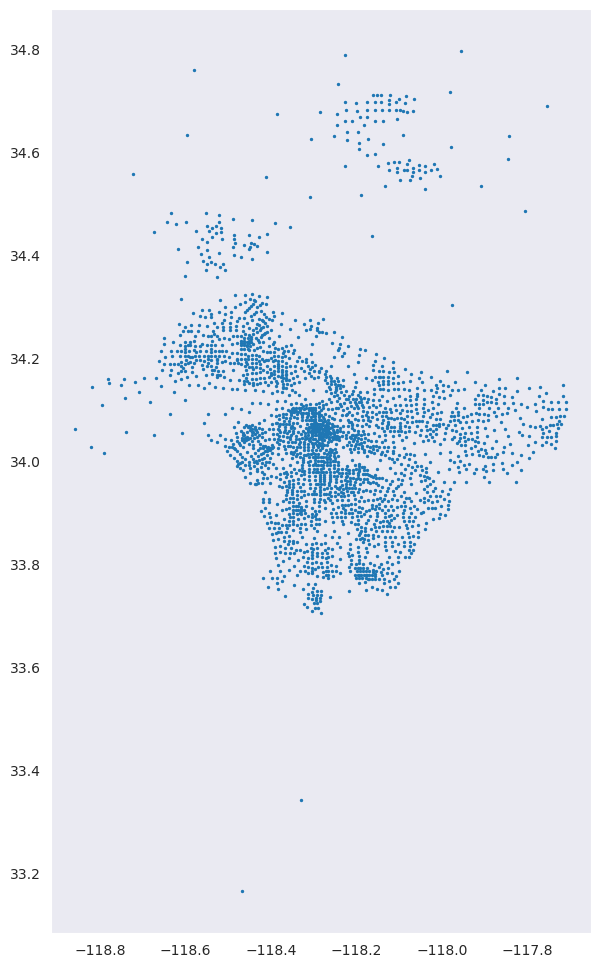

In [86]:
# remove old geometry column
df_tracts_centroid = df_tracts.drop(columns=['geometry'])
# set new column as our geometry
df_tracts_centroid = df_tracts_centroid.set_geometry('centroid')
# plot to check
df_tracts_centroid.plot(markersize =2, figsize = (12,12) )

In [87]:
# load neighborhood file
neighborhoods = gpd.read_file("https://services5.arcgis.com/7nsPwEMP38bSkCjy/arcgis/rest/services/LA_Times_Neighborhoods/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [88]:
neighborhoods

,OBJECTID,name,geometry
0,1,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0..."
1,2,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2..."
2,3,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0..."
3,4,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788..."
4,5,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0..."
...,...,...,...
109,110,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880..."
110,111,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0..."
111,112,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2..."
112,113,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1..."


In [89]:
# spatial join to place census tracts into a neighborhood 
df_neighborhoods = gpd.sjoin(neighborhoods, df_tracts_centroid)

In [90]:
# sum/average the columns from the census tract dataframe and create new columns that represent neighborhood-level values
df_neighborhoods['pop'] = df_neighborhoods.groupby("name", sort=False)["total_pop"].transform('sum')
df_neighborhoods['rentburden'] = df_neighborhoods.groupby("name", sort=False)["rent_burden"].transform('mean')
df_neighborhoods['housing_units'] = df_neighborhoods.groupby("name", sort=False)["total_housing_units"].transform('sum')
df_neighborhoods['white_units'] = df_neighborhoods.groupby("name", sort=False)["white_alone"].transform('sum')
df_neighborhoods['black_units'] = df_neighborhoods.groupby("name", sort=False)["black_alone"].transform('sum')
df_neighborhoods['american_indian_units'] = df_neighborhoods.groupby("name", sort=False)["american_indian_alone"].transform('sum')
df_neighborhoods['asian_units'] = df_neighborhoods.groupby("name", sort=False)["asian_alone"].transform('sum')
df_neighborhoods['native_hawaiian_units'] = df_neighborhoods.groupby("name", sort=False)["native_hawaiian_alone"].transform('sum')
df_neighborhoods['other_units'] = df_neighborhoods.groupby("name", sort=False)["other"].transform('sum')
df_neighborhoods['two_or_more_units'] = df_neighborhoods.groupby("name", sort=False)["two_or_more"].transform('sum')
df_neighborhoods['white_alone_not_hisp_units'] = df_neighborhoods.groupby("name", sort=False)["white_alone_not_hisp"].transform('sum')
df_neighborhoods['hispanic_units'] = df_neighborhoods.groupby("name", sort=False)["hispanic"].transform('sum')
df_neighborhoods = df_neighborhoods.drop(columns=['fips','index_right','OBJECTID','total_pop','total_housing_units','white_alone','black_alone','american_indian_alone','asian_alone','native_hawaiian_alone','other','two_or_more', 'white_alone_not_hisp', 'hispanic','rent_burden'])                                                      

In [91]:
# remove duplicates (i.e. original census tract data) and remove majority race category as we'll create a new one
df_neighborhoods = df_neighborhoods.drop(columns = ['majority_race'])
df_neighborhoods = df_neighborhoods.drop_duplicates()
df_neighborhoods

,name,geometry,pop,rentburden,housing_units,white_units,black_units,american_indian_units,asian_units,native_hawaiian_units,other_units,two_or_more_units,white_alone_not_hisp_units,hispanic_units
0,Adams-Normandie,"POLYGON ((-118.30069 34.03731, -118.30388 34.0...",17616,0.563765,4246,1132,930,25,472,12,1269,406,357,2460
1,Arleta,"POLYGON ((-118.44255 34.26412, -118.44240 34.2...",32333,0.515955,1460,629,21,0,194,36,402,178,100,1123
2,Arlington Heights,"POLYGON ((-118.31862 34.05306, -118.31673 34.0...",17696,0.566294,5179,1232,1203,17,831,0,1392,504,482,2596
3,Atwater Village,"MULTIPOLYGON (((-118.27886 34.15321, -118.2788...",10563,0.456861,2803,1466,8,72,565,0,441,251,1197,862
4,Baldwin Hills/Crenshaw,"POLYGON ((-118.36102 34.02532, -118.36026 34.0...",31450,0.569827,9720,1286,6133,99,546,19,927,710,535,2326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Wilmington,"MULTIPOLYGON (((-118.28331 33.75532, -118.2880...",56190,0.613767,9508,5702,530,57,314,17,2120,768,368,8267
110,Windsor Square,"POLYGON ((-118.31404 34.06254, -118.31420 34.0...",6632,0.498852,1863,546,134,0,833,0,209,141,503,334
111,Winnetka,"POLYGON ((-118.56232 34.23199, -118.56232 34.2...",46495,0.682613,6513,2125,365,44,891,0,2776,312,1519,3502
112,Woodland Hills,"POLYGON ((-118.57240 34.18668, -118.57161 34.1...",63163,0.515143,11033,6750,1503,23,1415,0,620,722,6003,1541


In [92]:
# create new function that categorizes race but based on neighborhoods
def categorise_race_neighborhoods(row):  
    if row['black_units'] > row['white_units'] and row['black_units'] > row['hispanic_units'] and row['black_units'] > row['other_units'] and row['black_units'] > row['asian_units']:
        return 'Black'
    elif row['hispanic_units'] > row['white_units'] and row['hispanic_units'] > row['black_units'] and row['hispanic_units'] > row['other_units'] and row['hispanic_units'] > row['asian_units']:
        return 'Hispanic'
    elif row['white_units'] > row['hispanic_units'] and row['white_units'] > row['black_units'] and row['white_units'] > row['other_units'] and row['white_units'] > row['asian_units']:
        return 'White'
    elif row['asian_units'] > row['hispanic_units'] and row['asian_units'] > row['black_units'] and row['asian_units'] > row['other_units'] and row['asian_units'] > row['white_units']:
        return 'Asian'
    return 'Other'

In [93]:
# create new majority race column and count values
df_neighborhoods['majority_race'] = df_neighborhoods.apply(lambda row: categorise_race_neighborhoods(row), axis=1)
df_neighborhoods.value_counts('majority_race')

majority_race
White       54
Hispanic    47
Black        6
Asian        4
Other        3
dtype: int64

<AxesSubplot: >

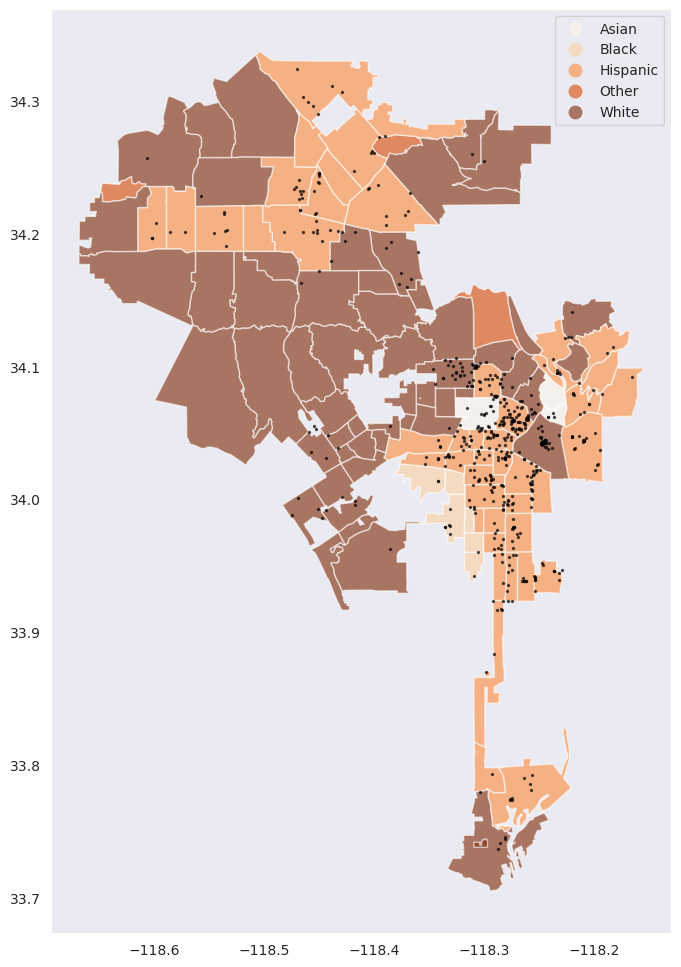

In [94]:
# plot neighborhoods with color representing majority race with affordable housing developments layered on top
fig,ax = plt.subplots(figsize=(12,12))
df_neighborhoods.plot(ax=ax,column='majority_race',legend=True,cmap='Oranges', alpha=.6)
gdfh.plot(ax=ax,markersize=2, color = "black", alpha = .6)

Observations from this exercise:
- The census tract data seemed to give us a clearer picture of race dynamics accross LA and it's relation to affordable housing development concentrations despite it being more granular. Perhaps this is due to the limitation of the neighborhoods data. Going forward, finding a blend of the two datasets would be ideal.
- The concentration of affordable housing developments is located in areas where hispanic and black renters are the majority of the renter populations. As discovered in the previous exercise, hispanic and black renters suffer from larger percentages of rent burden; it would seem likely that affordable housing developments would be located in communities that require it. What seems quite drastic and may provide a counterpoint to this assumption is the very low concentration of affordable housing developments in white neighborhoods.
- Although marginal communities require affordable housing, that does not necessarily explain why there are such little affordable housing developments in white communities. In order to explore this further, some next steps would be to assess the other rates of development through build permit data.
- Another goal would be to generate interactive chloropleth maps with affordable housing development point data overlaid on top.